# 가설검정 실습

In [2]:
# 패키지 임포트
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import math
from scipy import stats

# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정
if os.name == 'nt' :
    font_family = "Malgun Gothic"
    
# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

## 검정 통계량
## 1. 모분산을 알고 있는 경우 모평균의 가설 검정 = Z 검정(단일 표본)
- Scipy 패키지의 확률분포 클래스 stats.norm() 사용
- 사례) 사람의 평균 수명을 알아보기 위해 사망자 100명을 표본으로 추출하여 조사하였더니 평균 71.798년
으로 나타났다. 모표준편차를 8.9년으로 가정할 때, 현재의 평균 수명은 70년보다 길다고 할 수 있는가를  
검정하라(유의수준 q=0.05)  

1) 가설 설정
- 귀무가설 Hon=70년
- 대립가설 H:p>70년 (우측검정)
- 유의수준 a=0.05

2) 기각값(임계값)

In [3]:
# 기각값
z_95 = stats.norm.ppf(0.95)
print(z_95)

1.6448536269514722


3) 검정 통계량(z통계량)

In [6]:
# 변이 분석
n = 100
m_u = 70
m_sigma = 8.9
hysis_u = 71.789

# 검정 ㅌ오계량 계산
z = (hysis_u - m_u) / (m_sigma / np.sqrt(n))
print(z)

## print(2 * stats.norm().sf(np.abs(z))) # 유의확률

2.0101123595505634


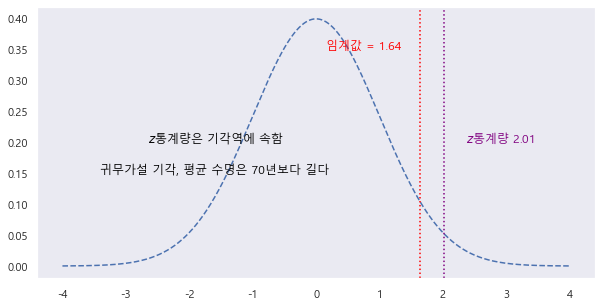

In [11]:
# 시각화
xx = np.linspace(-4, 4, 1000)
black = {"facecolor": "black"}
plt.figure(figsize=(10, 5))

pdf_norm = stats.norm.pdf(xx)

plt.plot(xx, pdf_norm, 'b--')

# 95%의 임계값 표시
plt.axvline(x=z_95, color='red', linestyle=':')
plt.text(0.75, .35, '임계값 = ' + str(round(z_95, 2)), horizontalalignment='center', color='red')
         
# 위에서 구한 카이분포 통계값
plt.axvline(x=z, color='purple', linestyle=':')
plt.text(2.9, .2, '$z$통계량 '+ str(round(z, 2)), horizontalalignment='center', color='purple')
plt.text(-1.5, .2, '$z$통계량은 기각역에 속함   ', horizontalalignment='center', color='black')
plt.text(-1.5, .15, '귀무가설 기각, 평균 수명은 70년보다 길다   ', horizontalalignment='center', color='black')

plt.grid()
plt.show()


### 검정 통계량
### 2. 모분산을 모르고 n<30 경우 모평균의 가설 검정
- Scipy 패키지의 확률분포 클래스 stats.t() 사용
- 사례) A편의점의 매운 라면의 연평균판매량 46개 였다고 한다. 12곳의 매장을 표본추출하여 매운 라면의  
  판매량을 조사하였더니 표본평균이 42, 표본표준편차가 11.9로 나타났다. 라면 판매량의 모집단은  
  정규모집단으로 가정했을 때 연평균판매량이 46개보다 적은지 검정하라. (유의수준 =0.05)  

1) 가설 설정
- 귀무가설 H0=46
- 대립가설 H1>46년 (좌측 검정)
- 유의수준 a=0.05

2) 기각값

In [16]:
# 변이 분석
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측검정 기각값, df: 자유도
t_95 = -1 * stats.t.ppf(0.95, df=n-1) # 좌측검정 * -1)

print(t_95)

-1.7958848187036691


3) 검정 통계량(t통계량)

In [17]:
# 통계량 t값 계산
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n))
print(t_value)

-1.1644039042479846


C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_16224/3001718254.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t_data, t_dist.pdf(t_data), 'b--', Label=("자유도(dof=%d)" % 11))
No handles with labels found to put in legend.


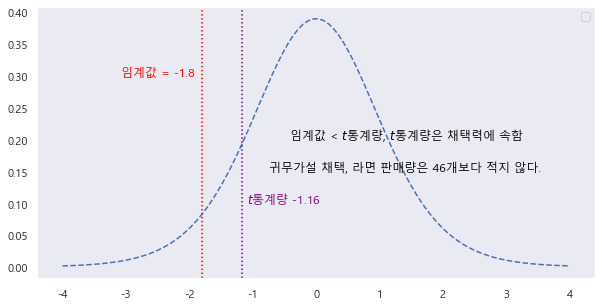

In [20]:
# 시각화
t_data = np.linspace(-4, 4, 100)
t_dist = stats.t(df=n-1)

black = {"facecolor": "black"}
plt.figure(figsize=(10, 5))

t_dist = stats.t(df=n-1)
plt.plot(t_data, t_dist.pdf(t_data), 'b--', Label=("자유도(dof=%d)" % 11))

# 95%의 임계값 표시
plt.axvline(x=t_95, color='red', linestyle=':')
plt.text(-2.5, .3, '임계값 = ' + str(round(t_95, 2)), horizontalalignment='center', color='red')

# 위에서 구한 카이분포 통계값 = z통계량
plt.axvline (x=t_value, color='purple', linestyle=':')
plt.text(-0.5, .1, '$t$통계량 '+ str(round(t_value, 2)), horizontalalignment='center', color='purple')
plt.text(1.5, .2, '임계값 < $t$통계량, $t$통계량은 채택력에 속함   ', horizontalalignment='center', color='black')
plt.text(1.5, .15, '귀무가설 채택, 라면 판매량은 46개보다 적지 않다.   ', color='black', horizontalalignment='center')
         
plt.grid()
plt.legend()
plt.show()


## p-value(유의확률 :  significant probability)
- 유의확률의 값은 확률밀도함수에서 표본값을 기준으로 만들어진 양측 꼬리(tail) 부분에 해당하는 영역의 면적
- 귀무가설이 맞음에도 불구하고 현재 검정 통계량값과 같은 혹은 대립가설을 더 옹호하는 검정 통계량값이 나올 확률

### 모분산을 모르고 n<30 경우 모평균의 가설 검정
- 통계량 t = 1.e1644
- 95% 좌측검정 기각값 : -1.7958
- 자유도 df : 12 -1

In [24]:
# 변이 분석
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측거정 기각값(유의수준:5%), df: 자유도
t_95 = round(-1 * stats.t.ppf(0.95, df=n-1), 3) # 좌측검정 * -1

print("기값 :", t_95)

# 통계량 t값 계산
t_value = (s_mu -  hysis_mu) / (s_sigma /np.sqrt(n))
print('t통계량 :', round(t_value,3))

기값 : -1.796
t통계량 : -1.164


In [25]:
# p_value(유의확률) 계산
round(stats.t(df=11).cdf(t_value),3)

0.134

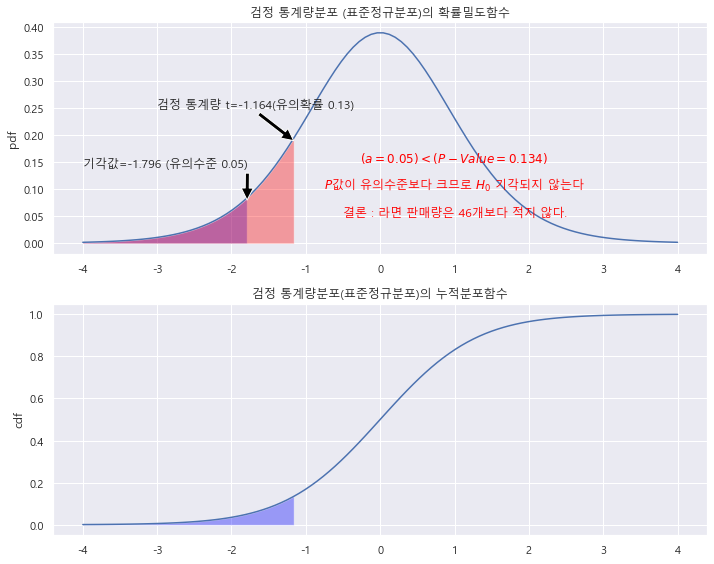

In [29]:
## 시각화
norm_rv = stats.t(df=11)

xx = np.linspace(-4, 4, 100)
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(xx, norm_rv.pdf(xx))
plt.ylabel("pdf")
plt.title("검정 통계량분포 (표준정규분포)의 확률밀도함수")
black = {"facecolor": "black"}

# 기각값 texr
plt.annotate('기각값=-1.796 (유의수준 0.05)', xy=(-1.79, 0.08), xytext=(-4, 0.14), arrowprops=black)

# 기각값 면적
xx2 = np.linspace(-4, -1.796, 100)
plt.fill_between(xx2, norm_rv.pdf(xx2), facecolor='blue', alpha=0.35)

# P-value (유의확률) test
plt.annotate('검정 통계량 t=-1.164(유의확률 0.13)', xy=(-1.164, 0.19), xytext=(-3, 0.25), arrowprops=black)

# P-value (유의확률) 면적
xx3 = np.linspace(-4, -1.164, 100)
plt.fill_between (xx3, norm_rv.pdf (xx3), facecolor='red', alpha=0.35)

plt.text(1, .15, '$(a = 0.05) < (P-Value = 0.134)$', horizontalalignment='center', color='red')

plt.text(1, .10, '$P$값이 유의수준보다 크므로 $H_0$ 기각되지 않는다', horizontalalignment='center', color='red')

plt.text(1, .05, '결론 : 라면 판매량은 46개보다 적지 않다.', horizontalalignment='center', color='red')

#누적분포도
plt.subplot(212)
plt.plot(xx, norm_rv.cdf(xx))

plt.fill_between(xx3, norm_rv.cdf(xx3), facecolor='blue', alpha=0.35)
plt.ylabel("cdf")
plt.title("검정 통계량분포(표준정규분포)의 누적분포함수")

plt.tight_layout()
plt.show()